In [8]:
import pandas as pd
df=pd.read_csv('토이프로젝트용다하고지워도됨1.csv',thousands=',',encoding='cp949')
df.columns = ['날짜','평균기온','강수량','일조시간','운량','배추평균가격']

In [18]:
배추 = df.copy()
배추.head()

,날짜,평균기온,강수량,일조시간,운량,배추평균가격
0,2015-01-02,-1.0,0.0,9.2,0.1,4000
1,2015-01-05,9.3,0.5,5.1,6.5,4000
2,2015-01-06,7.6,26.0,8.6,3.1,4000
3,2015-01-07,1.4,0.0,9.1,2.5,4000
4,2015-01-08,0.8,0.0,9.4,0.0,4000


In [10]:
월=[]
년=[]
for i in range(len(배추)):
    mon =배추['날짜'][i].split('-')[1]
    year = 배추['날짜'][i].split('-')[0]
    월.append(mon)
    년.append(year)

배추['월']=월
배추['년']=년

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50900 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 45380 missing from current font.
  font.load_char(ord(s), flags=flags)


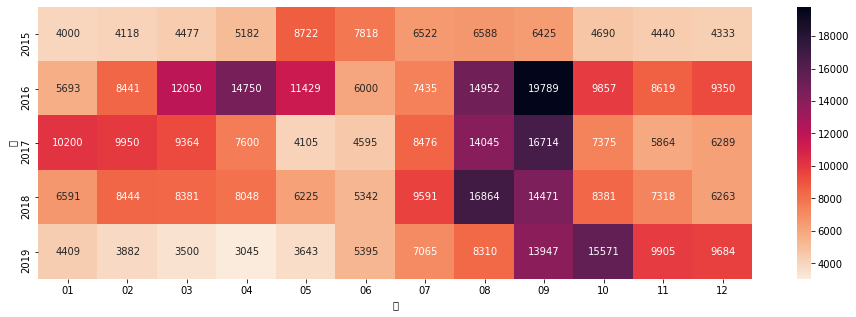

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
배추_pivot = 배추.pivot_table(values = '배추평균가격',
                                index='년',
                                columns='월')
plt.figure(figsize=(16,5))

#히트맵 그리기
sns.heatmap(배추_pivot,annot=True,fmt='.0f',cmap='rocket_r')
plt.show()

In [12]:
#  결측치 확인
배추.isnull().sum()

날짜        0
평균기온      0
강수량       0
일조시간      0
운량        0
배추평균가격    0
월         0
년         0
dtype: int64

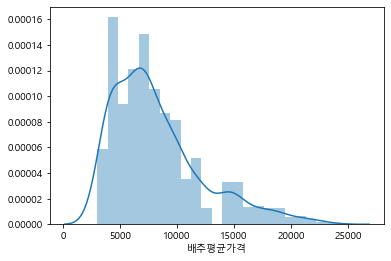

In [19]:
#타깃 값의 분포도 확인
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(배추['배추평균가격'])

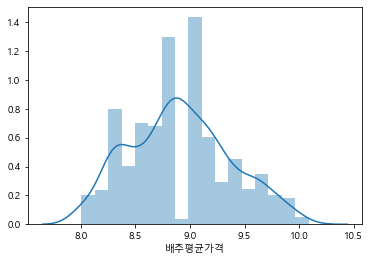

In [20]:
# 타깃값이 정규 분포 형태가 아니므로 로그 변환 적용후 다시 확인
로그_배추 = np.log1p(배추['배추평균가격'])
plt.rc('font',family = 'malgun gothic')
sns.distplot(로그_배추)

In [21]:
배추['배추평균가격']=np.log1p(배추['배추평균가격'])

In [22]:
월=[]

for i in range(len(배추)):
    mon = 배추['날짜'][i].split('-')[1]
    월.append(mon)
배추['월']=월

In [23]:
배추

,날짜,평균기온,강수량,일조시간,운량,배추평균가격,월
0,2015-01-02,-1.0,0.0,9.2,0.1,8.294300,01
1,2015-01-05,9.3,0.5,5.1,6.5,8.294300,01
2,2015-01-06,7.6,26.0,8.6,3.1,8.294300,01
3,2015-01-07,1.4,0.0,9.1,2.5,8.294300,01
4,2015-01-08,0.8,0.0,9.4,0.0,8.294300,01
...,...,...,...,...,...,...,...
1221,2019-12-23,7.7,0.0,7.9,3.0,9.210440,12
1222,2019-12-24,10.7,0.0,9.1,3.3,9.105091,12
1223,2019-12-26,3.6,0.0,9.2,0.0,9.105091,12
1224,2019-12-27,4.1,0.0,9.2,0.0,9.210440,12


In [25]:
#원-핫 인코딩
배추 = 배추[['평균기온','강수량','일조시간','운량','배추평균가격','월']]
print('get_dummies() 수행 전 데이터 Shape:', 배추.shape)
배추_원핫 = pd.get_dummies(배추)
print('get_dummies() 수행 후 데이터 Shape:', 배추_원핫.shape)

get_dummies() 수행 전 데이터 Shape: (1226, 6)
get_dummies() 수행 후 데이터 Shape: (1226, 17)


## 회귀 모델 학습/ 예측 평가
----

여러 모델의 로그 변환된 RMSE를 측정할 것이므로 이를 계산하는 함수를 먼저 생성하겠습니다.

In [28]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{} 로그 변환된 RMSE:{}'.format(model.__class__.__name__,np.round(rmse,3)))
    return rmse

def get_rmses(model):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

get_remse(model) 은 단일 모델의 RMSE 값을, get_remses(models)는 get_rmse()를 이용해 여러 모델의 RMSE 값을 반환합니다. 이제 선형 회귀 모델을 학습하고 예측, 평가해 보겠습니다.

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = 배추_원핫['배추평균가격']
X_features = 배추_원핫.drop('배추평균가격',axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                   test_size=0.2)

#선형,릿지,라쏘 학습 예측 평가

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE:0.413
Ridge 로그 변환된 RMSE:0.413
Lasso 로그 변환된 RMSE:0.469


[0.41336924392962543, 0.4130107378210376, 0.469224765649481]

In [32]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 40,70,60] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5,100] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.4637, 최적 alpha:{'alpha': 70}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.4585, 최적 alpha:{'alpha': 0.008}


In [33]:
from scipy.stats import skew

배추_index = 배추.dtypes[배추.dtypes != 'object'].index
skew_features = 배추[배추_index].apply(lambda x : skew(x))

# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

강수량    5.493322
dtype: float64


In [34]:
배추[skew_features_top.index] = np.log1p(배추[skew_features_top.index])

In [35]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
배추_원핫 = pd.get_dummies(배추)
y_target = 배추_원핫['배추평균가격']
X_features = 배추_원핫.drop('배추평균가격',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20.50,60,80,135,140,145]}
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10,50,100,150] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.4638, 최적 alpha:{'alpha': 80}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.4588, 최적 alpha:{'alpha': 0.008}


In [36]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=80)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.008)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


LinearRegression 로그 변환된 RMSE:0.411
Ridge 로그 변환된 RMSE:0.421
Lasso 로그 변환된 RMSE:0.415


[0.4113124892519392, 0.4205610379203354, 0.4152881034996846]

In [37]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

        
# 개별 모델의 학습
ridge_reg = Ridge(alpha=150)
ridge_reg.fit(X_train, y_train)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 개별 모델 예측
ridge_pred = ridge_reg.predict(X_test)
lr_pred = lr_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 * lr_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'LinearRegression': lr_pred}
#최종 혼합 모델, 개별모델의 RMSE 값 출력
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.41306198296860136
Ridge 모델의 RMSE: 0.4273193154380562
LinearRegression 모델의 RMSE: 0.4113124892519392


In [38]:
lr_reg.coef_

array([ 0.00580032,  0.00332509, -0.00912814, -0.01197956, -0.20645507,
       -0.0677999 , -0.02876493, -0.1311783 , -0.1651181 , -0.28488705,
       -0.01542749,  0.3635979 ,  0.55600105,  0.10657282, -0.07033493,
       -0.05620599])

최종혼합 모델의 성능이 가장 좋은 것을 알 수 있다.

In [39]:
import pickle
import os
dest = os.path.join('ridge','pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)

In [40]:
pickle.dump(lr_reg,
           open(os.path.join(dest,'reg.pkl'),'wb'),
           protocol=4)

In [162]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import os
import pickle

ridge_reg = pickle.load(open(os.path.join('ridge/pkl_objects',
                             'reg.pkl'),'rb'))


In [39]:
ridge_pred = ridge_reg.predict(X_test)
models = [ridge_reg]
get_rmses(models)

Ridge 로그 변환된 RMSE:0.388


[0.3880828273164747]